# Problem 1


In [2]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader,Dataset
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np

# 运行环境
device = 'cuda' if torch.cuda.is_available() else 'cpu'
if device == 'cuda':
    print(torch.cuda.get_device_name(0))
print(device)

Tesla K80
cuda


In [3]:
from sklearn import datasets as ds

def gen_data():
    iris = ds.load_iris()
    X = iris.data.astype(np.float32)
    Y = iris.target
    X_train = np.concatenate((X[0:30,],X[70:100,],X[100:130,])).astype(np.float32)
    Y_train = np.concatenate((Y[0:30],Y[70:100],Y[100:130]))
    X_test = np.concatenate((X[30:50,],X[50:70,],X[130:150,])).astype(np.float32)
    Y_test = np.concatenate((Y[30:50],Y[50:70],Y[130:150]))
    return (Iris_Data_Set(X_train,Y_train),Iris_Data_Set(X_test,Y_test))

class Iris_Data_Set(Dataset):
    def __init__(self,X,Y,n = 3):
        self.X = X
        self.size = len(Y)
        # one hot encoding
        self.Y = np.zeros((len(Y),n)).astype(np.float32)
        for i in range(self.size):
            self.Y[i,Y[i]] += 1
        self.Y_ex = Y
    def __len__(self):
        return len(self.Y)
    def __getitem__(self,idx):
        return self.X[idx],self.Y[idx]
    

In [89]:
train_data,test_data = gen_data()
train_dataloader = DataLoader(train_data, batch_size=10, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=1, shuffle=True)

In [ ]:
class FC_Neural_Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Linear(4,10),
            nn.ReLU(),
            nn.Linear(10,50),
            nn.ReLU(),
            nn.Linear(50,3),
            nn.ReLU(),
            nn.Softmax(dim=1)
        )
    def forward(self,x):
        predict = self.layer(x)
        return predict
model = FC_Neural_Network()

我使用的网络结构：

3层全连接神经网络，激活函数为ReLU，第一层10个神经元，第二层50个神经元，第三层3个神经元，后接Softmax输出。

In [91]:
def train_single(data_loader,model,loss_fn,optimizer):
    total = len(data_loader.dataset)
    for batch,(X,Y) in enumerate(data_loader):
        # Forward
        predict = model(X)
        loss = loss_fn(predict,Y)
        # BP
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        #print("{}/{}, loss = {}".format(batch * len(X),total,loss))
def test_single(data_loader,model,loss_fn):
    size = len(data_loader.dataset)
    num_batches = len(data_loader)
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X,Y in data_loader:
            predict = model(X)
            test_loss += loss_fn(predict, Y).item()
            correct += 1 if predict.argmax() == Y.argmax() else 0

    test_loss /= num_batches
    correct /= size
    print("test_loss = {},accuracy = {}".format(test_loss,correct))

In [ ]:
# 超参数
learning_rate = 1e-3
epoch = 80

model = FC_Neural_Network()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

for i in range(epoch):
    print("epoch = {}".format(i))
    train_single(train_dataloader,model,loss_fn,optimizer)
    if epoch % 10 == 0:
        test_single(test_dataloader,model,loss_fn)

epoch = 0
test_loss = 1.0950359225273132,accuracy = 0.3333333333333333
epoch = 1
test_loss = 1.0910527547200521,accuracy = 0.36666666666666664
epoch = 2
test_loss = 1.0879269301891328,accuracy = 0.6166666666666667
epoch = 3
test_loss = 1.0837839682896933,accuracy = 0.6666666666666666
epoch = 4
test_loss = 1.079423467318217,accuracy = 0.6666666666666666
epoch = 5
test_loss = 1.074316918849945,accuracy = 0.6666666666666666
epoch = 6
test_loss = 1.0676707088947297,accuracy = 0.65
epoch = 7
test_loss = 1.0589774231115976,accuracy = 0.6666666666666666
epoch = 8
test_loss = 1.0482819984356562,accuracy = 0.6666666666666666
epoch = 9
test_loss = 1.0358608524004618,accuracy = 0.6666666666666666
epoch = 10
test_loss = 1.0210670322179793,accuracy = 0.6666666666666666
epoch = 11
test_loss = 1.0046407252550125,accuracy = 0.6666666666666666
epoch = 12
test_loss = 0.9853262841701508,accuracy = 0.6666666666666666
epoch = 13
test_loss = 0.9634413580099742,accuracy = 0.6666666666666666
epoch = 14
test_l

可以看到，使用如上的神经网络，学习率1e-3，使用Adam作为optimizer，损失函数交叉熵的情况下，训练容易陷入正确率0.666的局部极值，经过多个epoch后有概率跳出该局部极值。

In [94]:
# 超参数
learning_rate = 5e-3
epoch = 80

model = nn.Sequential(
            nn.Linear(4,10),
            nn.ReLU(),
            nn.Linear(10,3),
            nn.ReLU(),
            nn.Softmax(dim=1)
        )
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate,betas=(0.9,0.99))

for i in range(epoch):
    print("epoch = {}".format(i))
    train_single(train_dataloader,model,loss_fn,optimizer)
    if epoch % 10 == 0:
        test_single(test_dataloader,model,loss_fn)

epoch = 0
test_loss = 1.0162702401479085,accuracy = 0.6666666666666666
epoch = 1
test_loss = 0.9863616764545441,accuracy = 0.6666666666666666
epoch = 2
test_loss = 0.9505513926347097,accuracy = 0.6666666666666666
epoch = 3
test_loss = 0.915719602505366,accuracy = 0.6666666666666666
epoch = 4
test_loss = 0.8911178151766459,accuracy = 0.6666666666666666
epoch = 5
test_loss = 0.8720739265282949,accuracy = 0.6666666666666666
epoch = 6
test_loss = 0.8588052640358607,accuracy = 0.6666666666666666
epoch = 7
test_loss = 0.846868226925532,accuracy = 0.6666666666666666
epoch = 8
test_loss = 0.83317249417305,accuracy = 0.6666666666666666
epoch = 9
test_loss = 0.8207427461942037,accuracy = 0.6833333333333333
epoch = 10
test_loss = 0.8087798684835434,accuracy = 0.8333333333333334
epoch = 11
test_loss = 0.7947273214658102,accuracy = 0.9
epoch = 12
test_loss = 0.7821705301602682,accuracy = 0.9833333333333333
epoch = 13
test_loss = 0.7673507044712703,accuracy = 0.9166666666666666
epoch = 14
test_loss 

如上，简化了网络结构，使用两层的圣经网络，第一层10个神经元，第二层3个神经元，后接Softmax输出；优化器Adam，学习率5e-3，损失函数交叉熵，这样训练收敛的速度更快,更容易跳出局部极值。

# Problem 2


## 环境搭建

In [26]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader,Dataset
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

device = 'cuda' if torch.cuda.is_available() else 'cpu'
if device == 'cuda':
    print(torch.cuda.get_device_name(0))
print(device)

Tesla K80
cuda


数据集下载

In [27]:
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



检查数据集

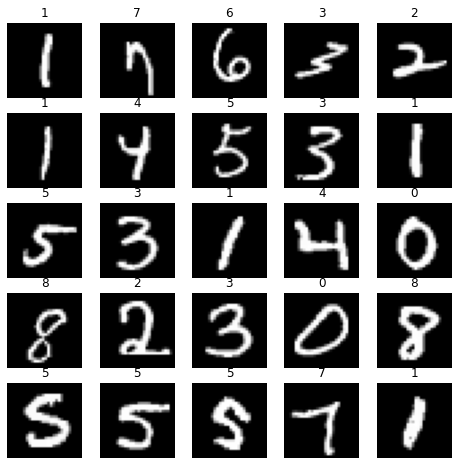

In [33]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(str(label))
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## 网络结构

In [53]:
class LeNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1,6,5,1,2),
            nn.Sigmoid()
        )
        self.avgpool1 = nn.AvgPool2d(2,2)
        self.conv2 = nn.Sequential(
            nn.Conv2d(6,16,5,1,0),
            nn.Sigmoid()
        )
        self.avgpool2 = nn.AvgPool2d(2,2)
        self.flatten = nn.Flatten()
        self.FC1 = nn.Sequential(
            nn.Linear(400,120),
            nn.Sigmoid()
        )
        self.FC2 = nn.Sequential(
            nn.Linear(120,84),
            nn.Sigmoid()
        )
        self.FC3 = nn.Sequential(
            nn.Linear(84,10),
            nn.Sigmoid()
        )
        self.softmax = nn.Softmax()
    def forward(self,x):
        x = self.conv1(x)
        x = self.avgpool1(x)
        x = self.conv2(x)
        x = self.avgpool2(x)
        x = self.flatten(x)
        x = self.FC1(x)
        x = self.FC2(x)
        x = self.FC3(x)
        predict = self.softmax(x)
        return predict


In [88]:
print(model)

LeNet(
  (conv1): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): Sigmoid()
  )
  (avgpool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Sequential(
    (0): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): Sigmoid()
  )
  (avgpool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (FC1): Sequential(
    (0): Linear(in_features=400, out_features=120, bias=True)
    (1): Sigmoid()
  )
  (FC2): Sequential(
    (0): Linear(in_features=120, out_features=84, bias=True)
    (1): Sigmoid()
  )
  (FC3): Sequential(
    (0): Linear(in_features=84, out_features=10, bias=True)
    (1): Sigmoid()
  )
  (softmax): Softmax(dim=None)
)


## 训练

In [60]:
def train_single(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_single(dataloader,model,loss_fn,loss_arr,acc_arr,flag):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    loss_arr.append(test_loss)
    acc_arr.append(correct)
    print(flag,end=' ')
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [61]:
# 超参数
batch_size = 256
total_epoch = 10
learning_rate = 1e-3

training_dataloader = DataLoader(training_data,batch_size=batch_size,shuffle=True)
test_dataloader = DataLoader(test_data,batch_size=256,shuffle=True)
train_v_dataloader = DataLoader(training_data,batch_size=256,shuffle=True)

In [62]:
train_loss = []
train_acc = []
test_loss = []
test_acc = []
model = LeNet()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for i in range(1,total_epoch+1):
    print("===== Epoch {} ======".format(i))
    train_single(training_dataloader,model,loss_fn,optimizer)
    test_single(test_dataloader,model,loss_fn,test_loss,test_acc,'Test')
    test_single(train_v_dataloader,model,loss_fn,train_loss,test_loss,'Train')

===== Epoch 1 ======
loss: 2.302619  [    0/60000]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


loss: 2.300423  [25600/60000]
loss: 2.291349  [51200/60000]
Test Test Error: 
 Accuracy: 38.3%, Avg loss: 2.271068 

Train Test Error: 
 Accuracy: 38.3%, Avg loss: 2.271196 

===== Epoch 2 ======
loss: 2.269680  [    0/60000]
loss: 2.236545  [25600/60000]
loss: 2.224044  [51200/60000]
Test Test Error: 
 Accuracy: 77.0%, Avg loss: 2.216274 

Train Test Error: 
 Accuracy: 76.2%, Avg loss: 2.217566 

===== Epoch 3 ======
loss: 2.219499  [    0/60000]
loss: 2.212428  [25600/60000]
loss: 2.204154  [51200/60000]
Test Test Error: 
 Accuracy: 81.6%, Avg loss: 2.203957 

Train Test Error: 
 Accuracy: 80.8%, Avg loss: 2.204930 

===== Epoch 4 ======
loss: 2.204138  [    0/60000]
loss: 2.207416  [25600/60000]
loss: 2.194892  [51200/60000]
Test Test Error: 
 Accuracy: 84.1%, Avg loss: 2.197835 

Train Test Error: 
 Accuracy: 83.5%, Avg loss: 2.198728 

===== Epoch 5 ======
loss: 2.196688  [    0/60000]
loss: 2.197824  [25600/60000]
loss: 2.202979  [51200/60000]
Test Test Error: 
 Accuracy: 84.9%, 

In [64]:
train_loss = []
train_acc = []
test_loss = []
test_acc = []
model = LeNet()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for i in range(1,total_epoch+1):
    print("===== Epoch {} ======".format(i))
    train_single(training_dataloader,model,loss_fn,optimizer)
    test_single(train_v_dataloader,model,loss_fn,train_loss,train_acc,'Train')
    test_single(test_dataloader,model,loss_fn,test_loss,test_acc,'Test')

===== Epoch 1 ======
loss: 2.303270  [    0/60000]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


loss: 2.301758  [25600/60000]
loss: 2.299503  [51200/60000]
Train Test Error: 
 Accuracy: 24.6%, Avg loss: 2.287329 

Test Test Error: 
 Accuracy: 24.2%, Avg loss: 2.287069 

===== Epoch 2 ======
loss: 2.287641  [    0/60000]
loss: 2.239968  [25600/60000]
loss: 2.222161  [51200/60000]
Train Test Error: 
 Accuracy: 72.5%, Avg loss: 2.216608 

Test Test Error: 
 Accuracy: 72.8%, Avg loss: 2.215495 

===== Epoch 3 ======
loss: 2.211304  [    0/60000]
loss: 2.207903  [25600/60000]
loss: 2.207790  [51200/60000]
Train Test Error: 
 Accuracy: 74.7%, Avg loss: 2.204878 

Test Test Error: 
 Accuracy: 75.2%, Avg loss: 2.204629 

===== Epoch 4 ======
loss: 2.202625  [    0/60000]
loss: 2.198543  [25600/60000]
loss: 2.202490  [51200/60000]
Train Test Error: 
 Accuracy: 76.1%, Avg loss: 2.200280 

Test Test Error: 
 Accuracy: 76.3%, Avg loss: 2.199733 

===== Epoch 5 ======
loss: 2.203380  [    0/60000]
loss: 2.195924  [25600/60000]
loss: 2.196443  [51200/60000]
Train Test Error: 
 Accuracy: 76.9%,

## 结果分析

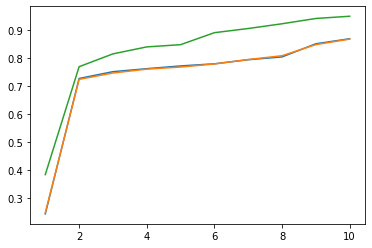

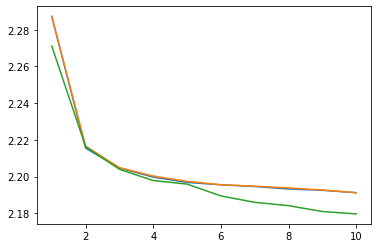

In [84]:
plt.plot(range(1,11),test_acc)
plt.plot(range(1,11),train_acc)
plt.plot(range(1,11),[0.383,0.770,0.816,0.841,0.849,0.892,0.907,0.924,0.943,0.951])
plt.show()
plt.plot(range(1,11),test_loss)
plt.plot(range(1,11),train_loss)
plt.plot(range(1,11),[2.271068,2.216274,2.203957,2.197835,2.195904,2.189464,2.185976,2.184160,2.180972,2.179664])
plt.show()

以上是同一个神经网络（LeNet）在相同超参数下训练两次的结果，可以看到，训练与测试数据很接近，没有出现过拟合现象，且两次训练结果有些差别，这体现出神经网络模型训练的随机性。

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


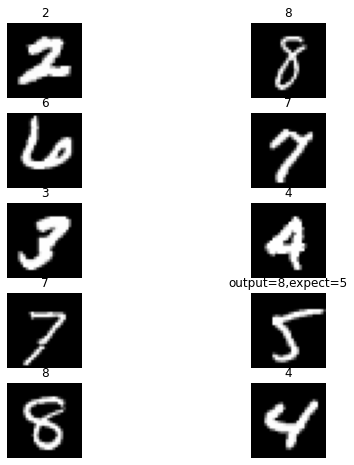

In [87]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 2, 5
for i in range(1, cols * rows + 1):
    #img, label = training_data[sample_idx]
    sample = next(iter(train_v_dataloader))
    img,label = sample
    figure.add_subplot(rows, cols, i)
    predict = model.forward(img).argmax(1)
    if predict[i] == label[i]:
        plt.title("{}".format(label[i]))
    else:
        plt.title("output={},expect={}".format(predict[i],label[i]))
    plt.axis("off")
    plt.imshow(img[i].squeeze(), cmap="gray")
plt.show()

以上是随机抽取10个样本的分类结果，可以看到大多数分类正确，但也出现了一个误分类的样本（输出8，标签为5）。